# Lesson 18: FIFA23 자료분석

최규빈  
2023-07-26

<a href="https://colab.research.google.com/github/guebin/IP2023WIN/blob/main/posts/Day3/08_ggplot2/2023-02-01-Lesson18.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" style="text-align: left"></a>

# ref

<https://guebin.github.io/DV2022/posts/2022-10-24-8wk-12.html#fifa23-데이터분석>

<https://guebin.github.io/DV2022/posts/2022-10-30-9wk-1-mid.html#자료분석-및-시각화-i-40점-fifa22자료>

# imports

In [1]:
# !pip install pandas_profiling

In [2]:
import pandas as pd
import numpy as np
import pandas_profiling
from plotnine import *

# FIFA23 데이터분석

## FIFA23 data

`-` FIFA23라는 축구게임이 있음

`-` 게임에 실제 선수들이 나오면서 선수들의 능력치가 세밀하게 구현되어
있음

`-` 선수들 능력치에 대한 데이터셋은 캐글에 공개되어 있음 -
https://www.kaggle.com/datasets/bryanb/fifa-player-stats-database?select=FIFA23_official_data.csv

## 데이터살펴보기

`-` 일단 살펴보기

In [16]:
df.loc[['Fernandes' in df.Name[i] for i in range(17660)],['Name','Overall']]

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/guebin/DV2022/master/posts/FIFA23_official_data.csv')
df.head()

트랜스포즈하여 보는 것이 편할때도 있음

In [4]:
df.T

`-` column이름조사

In [5]:
df.keys()

-   이름에 space가 있어서 좀 거슬림

`-` 각 column 별로 자료형조사

In [6]:
pd.DataFrame({'colname':df.keys(), 'dtype':[df[key].dtype for key in df.keys()]})

`-` 결측치조사

In [7]:
pd.DataFrame({'colname':df.keys(), 
              'dtype':[df[key].dtype for key in df.keys()],
              'na':[df[key].isna().sum() for key in df.keys()]
             })

(퀴즈) 열의선택: 결측치가 10000개 이상인 열을 보고싶다면?

In [8]:
df.loc[:,[df[key].isna().sum()>10000 for key in df.keys()]]

`-` .info()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17660 entries, 0 to 17659
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        17660 non-null  int64  
 1   Name                      17660 non-null  object 
 2   Age                       17660 non-null  int64  
 3   Photo                     17660 non-null  object 
 4   Nationality               17660 non-null  object 
 5   Flag                      17660 non-null  object 
 6   Overall                   17660 non-null  int64  
 7   Potential                 17660 non-null  int64  
 8   Club                      17449 non-null  object 
 9   Club Logo                 17660 non-null  object 
 10  Value                     17660 non-null  object 
 11  Wage                      17660 non-null  object 
 12  Special                   17660 non-null  int64  
 13  Preferred Foot            17660 non-null  object 
 14  Intern

`-` .describe(): 숫자들이 저장된 column에 대하여 기본통계량 조사

In [10]:
df.describe()

`-` pandas_profiling.ProfileReport()을 이용한 전체적인 조사

In [15]:
# pandas_profiling.ProfileReport(df).to_file('fifa2023_reprot.html')

`-` 특정열을 중심으로 정렬하여 보기

In [16]:
df.sort_values(by='Overall',ascending=False).reset_index()

`-` 특정열을 중심으로 그룹화하여 보기 ($\star$)

In [17]:
df.Nationality.unique() # 데이터셋에 포함된 나라들 출력

In [18]:
df.groupby(by='Nationality')[['Overall']].agg({np.mean,len}).sort_values(('Overall', 'mean'),ascending=False)

-   groupby는 나중에 다시 설명 합니다.

## 데이터정리하기

`-` 칼럼이름변경

In [19]:
df.set_axis(pd.Index(map(lambda x: x.replace(' ','_'), df.columns)), axis=1)

`-` 결측치제거

In [20]:
df.drop(columns=['Loaned From', 'Best Overall Rating']).dropna()

`-` Height, Weight의 자료형을 float형으로 수정하기

In [21]:
df.assign(
    Height= list(map(lambda x: float(x[:-2]), df.Height)),
    Weight= list(map(lambda x: float(x[:-2]), df.Weight))
)

`-` Release Clause의 자료형을 float으로 수정하기

In [22]:
df['Release Clause']

In [23]:
_f = lambda x: float(x[1:-1])*1000 if x[-1]=='K' else float(x[1:-1])*1000000

In [24]:
_f('€157M')

In [25]:
_f('€131K')

(시도1–실패)

In [26]:
list(map(_f,df['Release Clause']))

(시도1이 실패한 이유)

In [27]:
df['Release Clause'].isna().sum() # 이 column에는 1151개의 결측치가 존재

(nan에 대한 예비학습)

In [28]:
df.loc[df['Release Clause'].isna(), 'Release Clause']

In [29]:
df.loc[18, 'Release Clause']

In [30]:
pd.isna(df.loc[18, 'Release Clause'])

In [31]:
type(df.loc[18, 'Release Clause'])

In [32]:
df.loc[18, 'Release Clause'][-1]

(시도2–성공)

In [33]:
df.rename(columns={'Release Clause':'ReleaseClause'})\
.assign(ReleaseClause = list(map(lambda x: _f(x) if pd.isna(x)==False else x , df['Release Clause'])))\
.rename(columns={'ReleaseClause':'Release Clause'})

(시도3–성공) 그냥 결측치를 제거하고 변형해도 무방..

In [34]:
df2 = df.drop(columns=['Loaned From', 'Best Overall Rating']).dropna()
df2['Release Clause'] = list(map(lambda x: _f(x) if pd.isna(x)==False else x , df2['Release Clause']))
df2

> 분석의 편의를 위하여 (1) colnames를 변경하고 (2) 결측치를 제거하고 (3)
> 몇 가지 전 처리를 추가로 진행한 뒤 df2를 만들어서 분석하는게 좋음

## 데이터분석+시각화

`-` Overall vs Potential

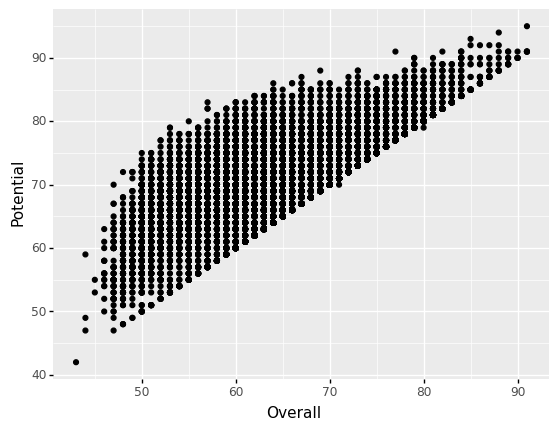

In [35]:
ggplot(data=df) + geom_point(aes(x='Overall',y='Potential'))

-   뭔가 Potential \> Overall 인 관계가 성립하는 듯 하다. $\to$ 우리가
    생각하는 포텐셜의 의미는 사실 Potential2 = Potential - Overall 에 더
    가깝다. $\to$ Potential2 = Potential - Overall 인 변수를 새로 만들고
    시각화 해보자.

`-` Potential2 = Potential - Overall 를 계산하여 새로운 열을 추가하자.

In [36]:
df.eval('Potential2 = Potential - Overall')

`-` 수정된 데이터프레임으로 다시 시각화를 하자.

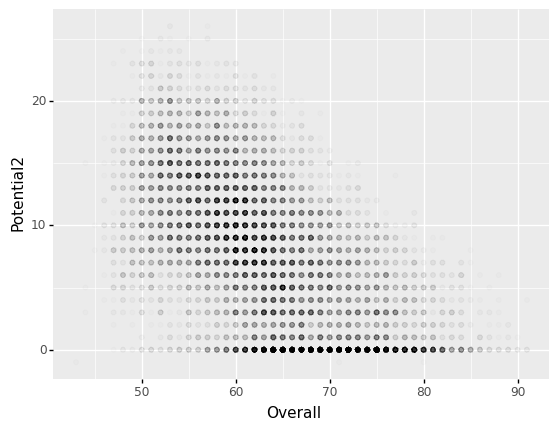

In [37]:
ggplot(data=df.eval('Potential2 = Potential - Overall'))\
+ geom_point(aes(x='Overall',y='Potential2'),alpha=0.01)

`-` 일부점들이 겹치므로 position = ’jitter’를 사용하여 점들을 흩뿌리자.

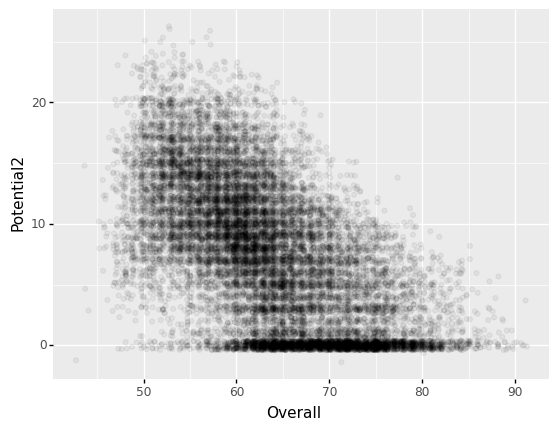

In [38]:
ggplot(data=df.eval('Potential2 = Potential - Overall'))\
+ geom_point(aes(x='Overall',y='Potential2'),alpha=0.05,position='jitter')

`-` 해석 - 해석1: Overall, Potential2는 음의 상관관계가 있다. - 해석2:
0근처에 데이터가 많음 $\to$ 이미 은퇴한 선수들이 아닐까? - 해석3:
Overall의 값이 작을수록 Potential2의 분산이 크다.

`-` 은퇴한 선수들은 제외하고 시각화하자.

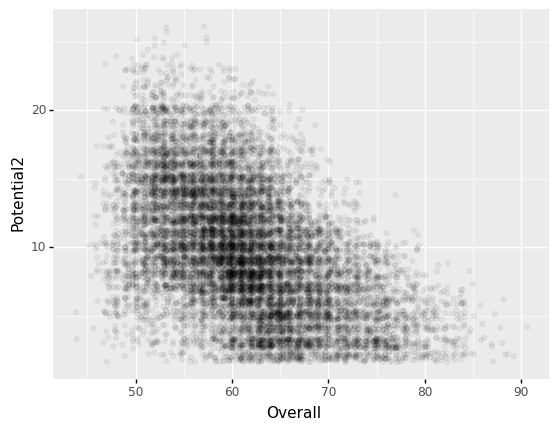

In [39]:
ggplot(data=df.eval('Potential2 = Potential - Overall').query('Potential2 > 1'))\
+ geom_point(aes(x='Overall',y='Potential2'),alpha=0.05,position='jitter')

`-` Overall에 따라서 구간을 나누고 그 구간에 대응하는 boxplot을 그리자.

In [40]:
df.eval('Potential2 = Potential - Overall').query('Potential2 > 1')\
.Overall.describe()

In [41]:
def f(x):
    if x>66: 
        y='66<'
    elif x>61:
        y='61~66'
    elif x>56:
        y='56~61'
    else:
        y='<56' 
    return y

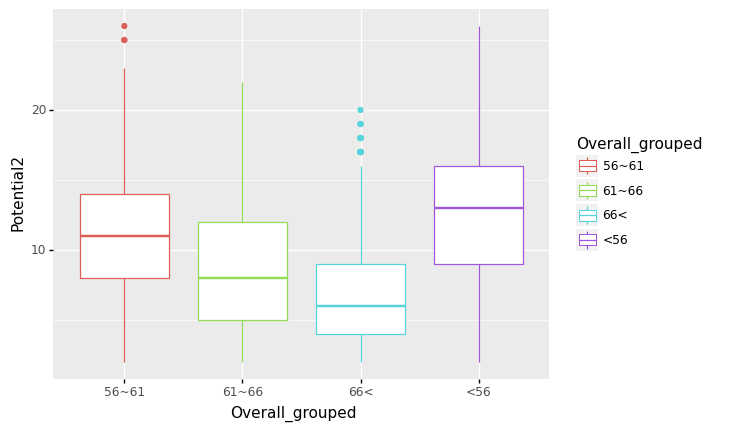

In [42]:
ggplot(data=df.eval('Potential2 = Potential - Overall').query('Potential2 > 1')\
.assign(Overall_grouped= lambda df: list(map(f,df.Overall))))\
    + geom_boxplot(aes(x='Overall_grouped',y='Potential2',color='Overall_grouped'))

-   Overall_grouped = “\<56” 에 대응하는 점들을 모두 뽑아서
    mean(Overall)를 계산하고 그 값을 Overall_grouped = “\<56” 에
    대응하는 박스플랏의 x축위치로 설정

-   Overall_grouped = “56~61” 에 대응하는 점들을 모두 뽑아서
    mean(Overall)를 계산하고 그 값을 Overall_grouped = “56~61” 에
    대응하는 박스플랏의 x축위치로 설정

-   Overall_grouped = “61~66” 에 대응하는 점들을 모두 뽑아서
    mean(Overall)를 계산하고 그 값을 Overall_grouped = “61~66” 에
    대응하는 박스플랏의 x축위치로 설정

-   Overall_grouped = “66\<” 에 대응하는 점들을 모두 뽑아서
    mean(Overall)를 계산하고 그 값을 Overall_grouped = “66\<” 에
    대응하는 박스플랏의 x축위치로 설정

In [43]:
df.eval('Potential2 = Potential - Overall').query('Potential2 > 1')\
.assign(Overall_grouped= lambda df: list(map(f,df.Overall)))\
.query("Overall_grouped == '66<'").Overall.mean()

(방법1)

In [44]:
def g(x):
    if x=='66<': 
        y= 71.8127687727423
    elif x=='61~66':
        y= 63.773918342474104
    elif x=='56~61':
        y= 59.155840684309005
    else:
        y= 52.87743190661479
    return y

In [45]:
df.eval('Potential2 = Potential - Overall').query('Potential2 > 1')\
.assign(Overall_grouped= lambda df: list(map(f,df.Overall)))\
.assign(Overall_x= lambda df: list(map(g,df.Overall_grouped)))

In [46]:
df2= df.eval('Potential2 = Potential - Overall').query('Potential2 > 1')\
.assign(Overall_grouped= lambda df: list(map(f,df.Overall)))\
.assign(Overall_x= lambda df: list(map(g,df.Overall_grouped)))
df2

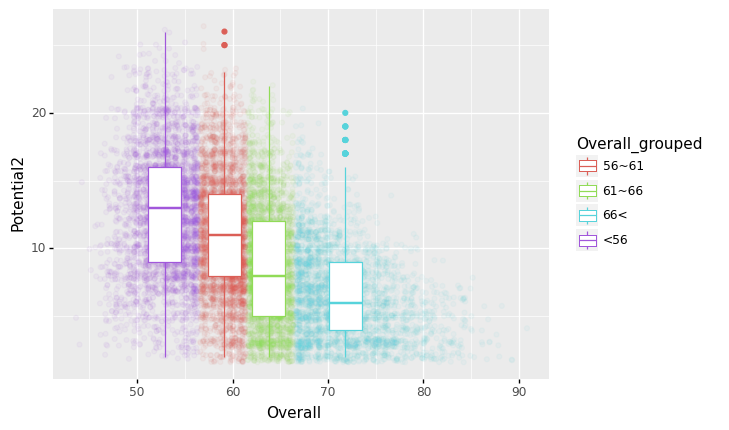

In [47]:
ggplot(data=df2)\
+geom_point(aes(x='Overall',y='Potential2',color='Overall_grouped'),position='jitter',alpha=0.05)\
+geom_boxplot(aes(x='Overall_x',y='Potential2',color='Overall_grouped'))

(방법2)

In [48]:
_df = df.eval('Potential2 = Potential - Overall').query('Potential2 > 1')\
.assign(Overall_grouped= lambda df: list(map(f,df.Overall)))

In [49]:
df3=_df.groupby(by="Overall_grouped").agg({'Overall':np.mean}).reset_index()\
.rename(columns={'Overall':'Overall_x'}).merge(_df)

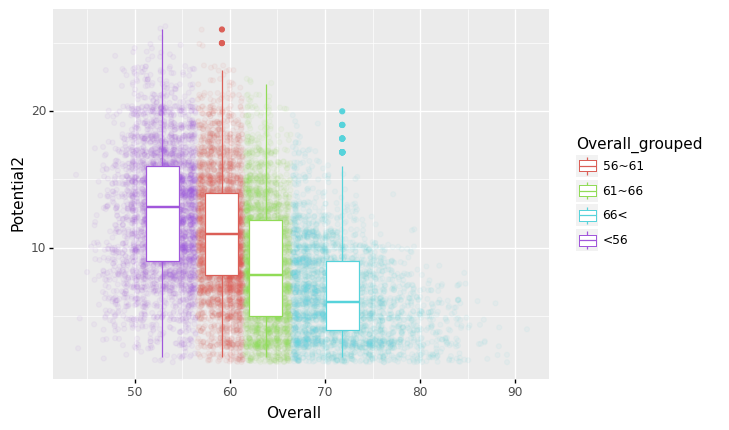

In [50]:
ggplot(data=df3)\
+geom_point(aes(x='Overall',y='Potential2',color='Overall_grouped'),position='jitter',alpha=0.05)\
+geom_boxplot(aes(x='Overall_x',y='Potential2',color='Overall_grouped'))

# FIFA22 데이터분석

데이터시각화 중간고사문제에서 발췌

아래의 코드를 활용하여 FIFA22의 자료를 불러온뒤 물음에 답하라.

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/guebin/DV2021/master/_notebooks/2021-10-25-FIFA22_official_data.csv')
df

`(1)` 연령별로 선수들의 잠재력을 시각화하고 싶다. 여기에서 잠재력은
아래의 수식의 Potential2를 의미한다.

    Potential2 = Potential - Overall

아래의 세부지침에 맞추어 연령별 Potential2의 산점도와 boxplot을 그려라.
– (10점)

**(세부지침)**

**step1**: 결측치가 가장 많은 2개의 컬럼을 찾고 이를 제거하라.

**step2**: dropna()를 이용하여 결측치를 제거하라.

**step3**: Potential2 = Potential - Overall 를 이용하여 Potential2를
구하라.

**step4**: 구간 \[0,20,22,26,100\]를 설정하고 이를 기준으로 Age를
그룹화하라. (총 4개의 그룹으로 나누어져야 한다)

**step5**: 그룹화된 Age를 x축으로, Potential2를 y축으로, 색깔을 그룹화된
Age로 설정한 뒤 산점도와 박스플랏을 겹쳐그려라. - 산점도의 파라메터:
alpha=0.5,size=0.1,position=‘jitter’ - 박스플랏의 파라메터: alpha=0.8

(풀이)

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16710 entries, 0 to 16709
Data columns (total 65 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        16710 non-null  int64  
 1   Name                      16710 non-null  object 
 2   Age                       16710 non-null  int64  
 3   Photo                     16710 non-null  object 
 4   Nationality               16710 non-null  object 
 5   Flag                      16710 non-null  object 
 6   Overall                   16710 non-null  int64  
 7   Potential                 16710 non-null  int64  
 8   Club                      16446 non-null  object 
 9   Club Logo                 16710 non-null  object 
 10  Value                     16710 non-null  object 
 11  Wage                      16710 non-null  object 
 12  Special                   16710 non-null  int64  
 13  Preferred Foot            16710 non-null  object 
 14  Intern

-   ’Loaned From’와 ’Marking’이 가장 결측치가 많이 포함되어있음

In [39]:
data1= df.drop(columns=['Loaned From', 'Marking']).dropna()\
.eval('Potential2 = Potential- Overall')\
.assign(Age = lambda df: pd.cut(df['Age'],[0,20,22,26,100]))
data1 

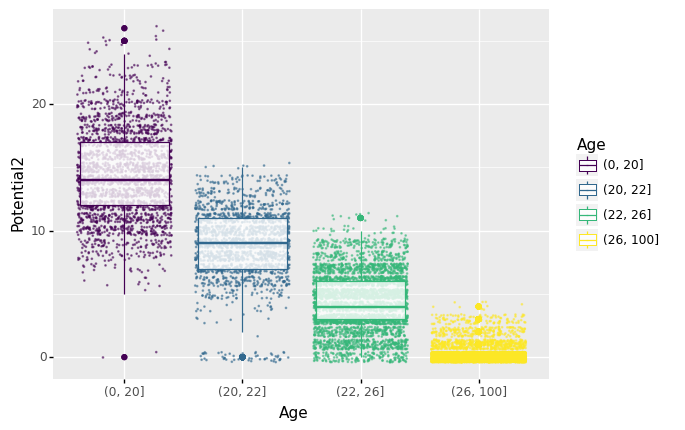

In [73]:
fig = ggplot(data=data1)
scatter = geom_point(aes(x='Age',y='Potential2',colour='Age'),alpha=0.5,size=0.1,position='jitter')
boxplot = geom_boxplot(aes(x='Age',y='Potential2',colour='Age'),alpha=0.8)
fig+scatter+boxplot

-   채점기준: Age의 Label을 사용하지 않아도 만점으로 인정함.

`(2)` 포지션별로 선수들의 능력치와 Wage를 시각화하고 싶다. 아래의
dictionary를 이용하여 Position을 재정의하라.

In [45]:
position_dict = {
    'GOALKEEPER':{'GK'},
    'DEFENDER':{'CB','RCB','LCB','RB','LB','RWB','LWB'},
    'MIDFIELDER':{'CM','RCM','LCM','CDM','RDM','LDM','CAM','RAM','LAM','RM','LM'},
    'FORWARD':{'ST','CF','RF','LF','RW','LW','RS','LS'},
    'SUB':{'SUB'},
    'RES':{'RES'}
}
position_dict

아래의 세부지침에 맞추어 포지션별 ShotPower와 SlidingTackle의 산점도를
그려라. – (30점)

**세부지침**

**step1**: 결측치가 가장 많은 2개의 컬럼을 찾고 이를 제거하라.

**step2**: dropna()를 이용하여 결측치를 제거하라.

**step3**: hint1과 position_dict을 참고하여 Position을 적절하게
변환하라. (변환된 값을 Position으로 저장할 것)

**step4**: hint2를 참고하여 Wage를 적절하게 변환하라. (변환된 값을
Wage에 저장할 것)

**step5**: Position==“DEFENDER” or Position==“FORWARD”에 해당하는
관측치를 고른 뒤 x축에 ShotPower, y축에 SlidingTackle 을 시각화하라.
Position은 color로 구분하고 Wage는 size와 alpha로 구분하라.

**hint1**: Position column의 변환을 위한 코드

In [46]:
'<span class="pos pos18">CAM'.split('>')

**hint2**: Wage column의 변환을 위한 함수

In [47]:
def f(x):
    if x[-1] == 'K' :
        y= float(x[1:-1])*1000
    elif x[-1] == 'M' : 
        y= float(x[1:-1])*1000000
    else:
        y= 0 
    return y 

(풀이)

In [92]:
data2=df.drop(columns=['Loaned From', 'Marking']).dropna()\
.assign(Wage = lambda df: list(map(f,df['Wage'])))\
.assign(Position = lambda df: list(map(lambda x: x.split('>')[-1], df.Position)))\
.assign(Position = lambda df: 
        [key for x in df.Position for key in position_dict if x in position_dict[key]]
       )
data2

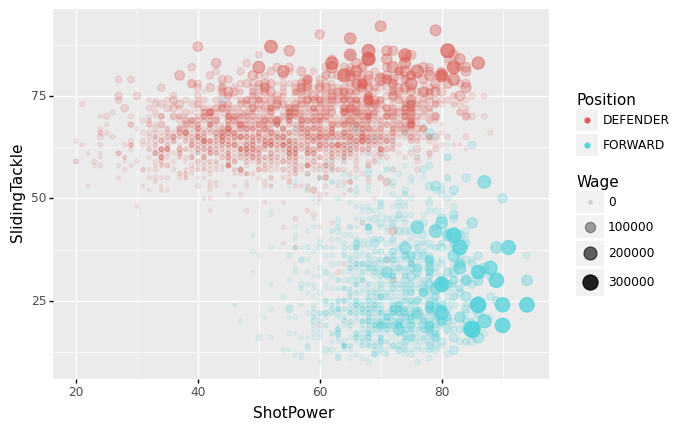

In [50]:
fig = ggplot(data=data2.query('Position=="DEFENDER" or Position=="FORWARD"'))
scatter = geom_point(aes(x='ShotPower',y='SlidingTackle',color='Position',size='Wage',alpha='Wage'))
fig+scatter

-   채점기준: df\[‘Position’\]이 아니라 df\[‘Best Position’\]을 이용하여
    자료를 변형하고 시각화 하는 경우 부분점수 없이 0점임